# Physics 261: Class 17
## 04 Mar 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Questions from last class: issues with @evaluate issues.
    2. Schedule for this week and end of semester
    3. Random numbers in Julia II; The birthday problem
    
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>


In [2]:
using GLMakie

# Issues with timing code
Let's create a simple function to time some code. 

## Random number generation
One way to solve problems involves using random numbers to simulate systems where the underlying process is statitically random. 
To do this, we need to be able to pick a random number (typically between 0 and 1, but not always!).</br> We can use the [Random.jl package](https://docs.julialang.org/en/v1/stdlib/Random/) to choose random numbers. (You may also find it useful to see the [Distributions.jl package](https://juliastats.org/Distributions.jl/stable/starting/) if you do a lot of staticaal work.)

In [1]:
using Random, GLMakie, BenchmarkTools

## The Birthday Problem
The birthday problem asks the following question: 

    How many people do you need to have in the room so that there is a 50% chance that at least two people have the same birthday?

If you haven't thought about it, you may find that the answer is surprising. This problem can be analytically reasoned out (see the [Wikipedia entry](https://en.wikipedia.org/wiki/Birthday_problem#:~:text=In%20probability%20theory%2C%20the%20birthday,that%20probability%20to%20exceed%2050%25.) for example)
but today, we'll write some computer code to numerically answer this question. 

### Strategy: 
0. Start with n=5 (for example)
1. Choose n random integers from 1 to 365 (inclusive)
2. See if there are any duplicate numbers. If there is, then count that random trial as a success.
3. generate  M_samples (a large number), keeping track of the number of sucesses.
4. The probability of finding at least two people with the same birthday with n=5 people is then $n_{\text{successes}}/M_{\text{samples}}$
5. Now increment n by one and repeat; each time computing the probability of success.
6. Make a plot of Probability vs n to see where the probability is equal to 0.50

In [2]:
# needs Random.jl
function BirthdayProblem(Nmin, Nmax, Msamples)
    P = zeros(Nmax-Nmin + 1)
    for n in Nmin:Nmax
        n_duplicates=0
        for i in 1:Msamples
            sample = rand(1:365, n)
            sorted = set(sort!(sample))
            if length(sample) - length(sorted) ≥ 1
                n_duplicates = n_duplicates + 1
            end
        end
        P[n-Nmin+1] = n_duplicates/Msamples  # index is n-Nmin-1; remember lowest n value is Nmin
    end
    return P
end     

BirthdayProblem (generic function with 1 method)

In [3]:
Nmin, Nmax, Msamples = 2, 100, 100

(2, 100, 100)

In [ ]:
@benchmark BirthdayProblem(Nmin, Nmax, Msamples)

BenchmarkTools.Trial: 456 samples with 1 evaluation.
 Range (min … max):  10.112 ms …  11.860 ms  ┊ GC (min … max): 0.00% … 9.61%
 Time  (median):     11.011 ms               ┊ GC (median):    5.35%
 Time  (mean ± σ):   10.976 ms ± 454.213 μs  ┊ GC (mean ± σ):  3.93% ± 3.64%

             ▁▁ ▄▃▇█ ▁                     ▂▄▂                  
  ▃▁▁▂▄▄▄▄▄▇▇██▇██████▄▆▄▂▂▁▂▁▃▆▃▅▄▆▅▃▄▄▄▇▇██████▆▆█▇▆▆▇▄▄▃▄▂▄ ▄
  10.1 ms         Histogram: frequency by time         11.8 ms <

 Memory estimate: 25.20 MiB, allocs estimate: 88696.

In [4]:
values = @benchmark BirthdayProblem(Nmin, Nmax, Msamples)

BenchmarkTools.Trial: 465 samples with 1 evaluation.
 Range (min … max):  10.045 ms …  13.552 ms  ┊ GC (min … max): 0.00% … 19.45%
 Time  (median):     10.797 ms               ┊ GC (median):    4.28%
 Time  (mean ± σ):   10.744 ms ± 429.845 μs  ┊ GC (mean ± σ):  3.53% ±  3.20%

             ▃▆█▂▁                     ▁                        
  ▃▃▃▄▂▃▄▇▅█▆██████▃▃▃▁▃▁▄▃▃▂▃▃▃▆▅▆▇▆▆▅█▆▇▇▆▄▅▆▅▆▇▇▄▆▄▆▇▇▆▃▃▃▃ ▄
  10 ms           Histogram: frequency by time         11.4 ms <

 Memory estimate: 25.21 MiB, allocs estimate: 88705.

In [6]:
mean(values.times)/1e9 # no idea why this doesn't work

0.010743961311827957

In [22]:
trials = [@elapsed BirthdayProblem(Nmin, Nmax, Msamples) for i in 1:1000]

1000-element Vector{Float64}:
 0.028224875
 0.0133545
 0.018284416
 0.011789125
 0.01230475
 0.010719917
 0.011970792
 0.010916917
 0.011296333
 0.010348583
 0.011771291
 0.010469917
 0.011180458
 ⋮
 0.0122815
 0.010890375
 0.01226425
 0.010551
 0.011354
 0.010455875
 0.011876541
 0.010359375
 0.011359541
 0.011810792
 0.010292292
 0.011212

In [26]:
function chauvenet(v; nstd=3)
    ## This function is only reasonable if one expects the input
    ## vector to be roughly constant
    v̄ = mean(v)
    σ = std(v)
    new_v = Float64[]
    for value in v
        if value < v̄ + 3σ &&  value > v̄ - 3σ
            push!(new_v, value)
        end
    end
    return new_v
end

chauvenet (generic function with 1 method)

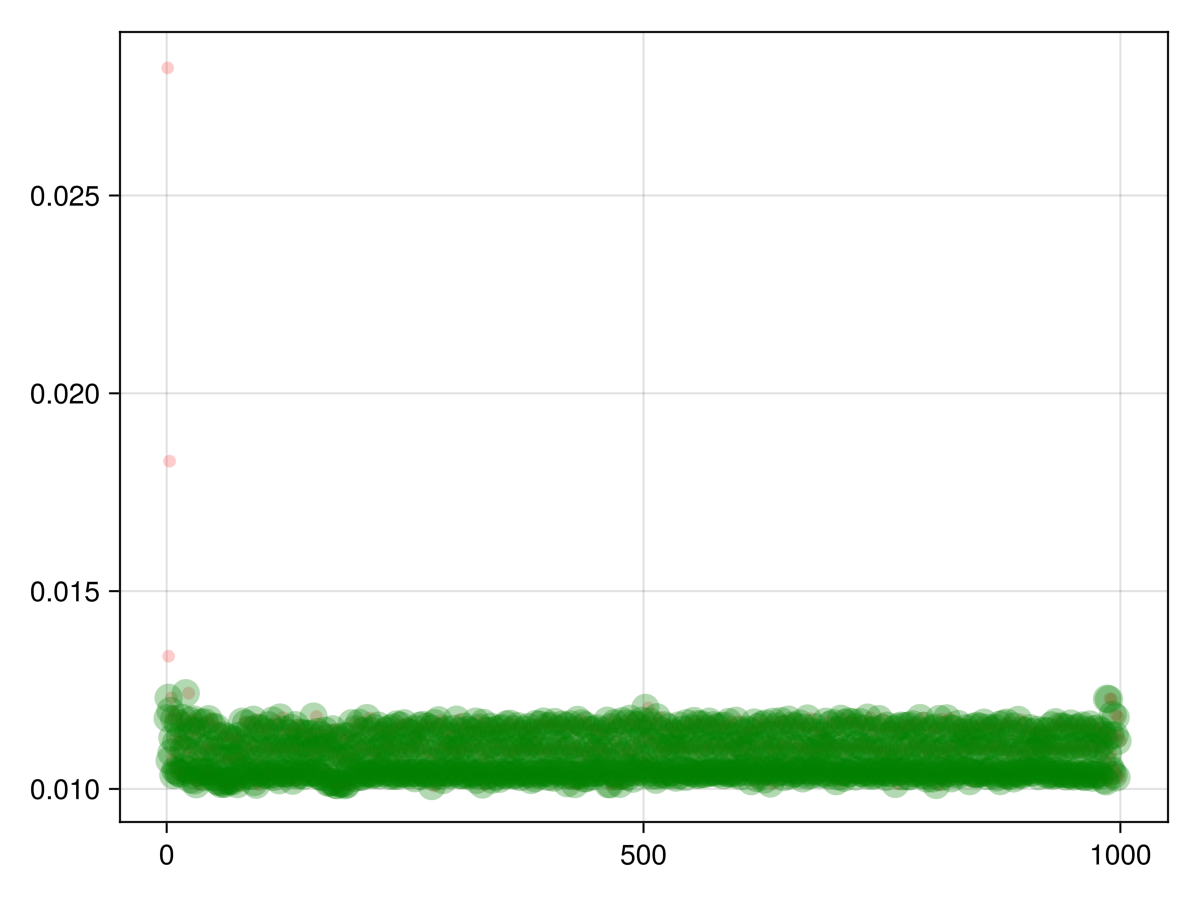

In [34]:
filtered_trials = chauvenet(trials; nstd=3)
fig = Figure()
ax = Axis(fig[1,1])
scatter!(ax,1:length(trials), (trials), color=(:red, 0.2))
scatter!(ax,1:length(filtered_trials), filtered_trials, color=(:green, 0.3), markersize=20)
fig


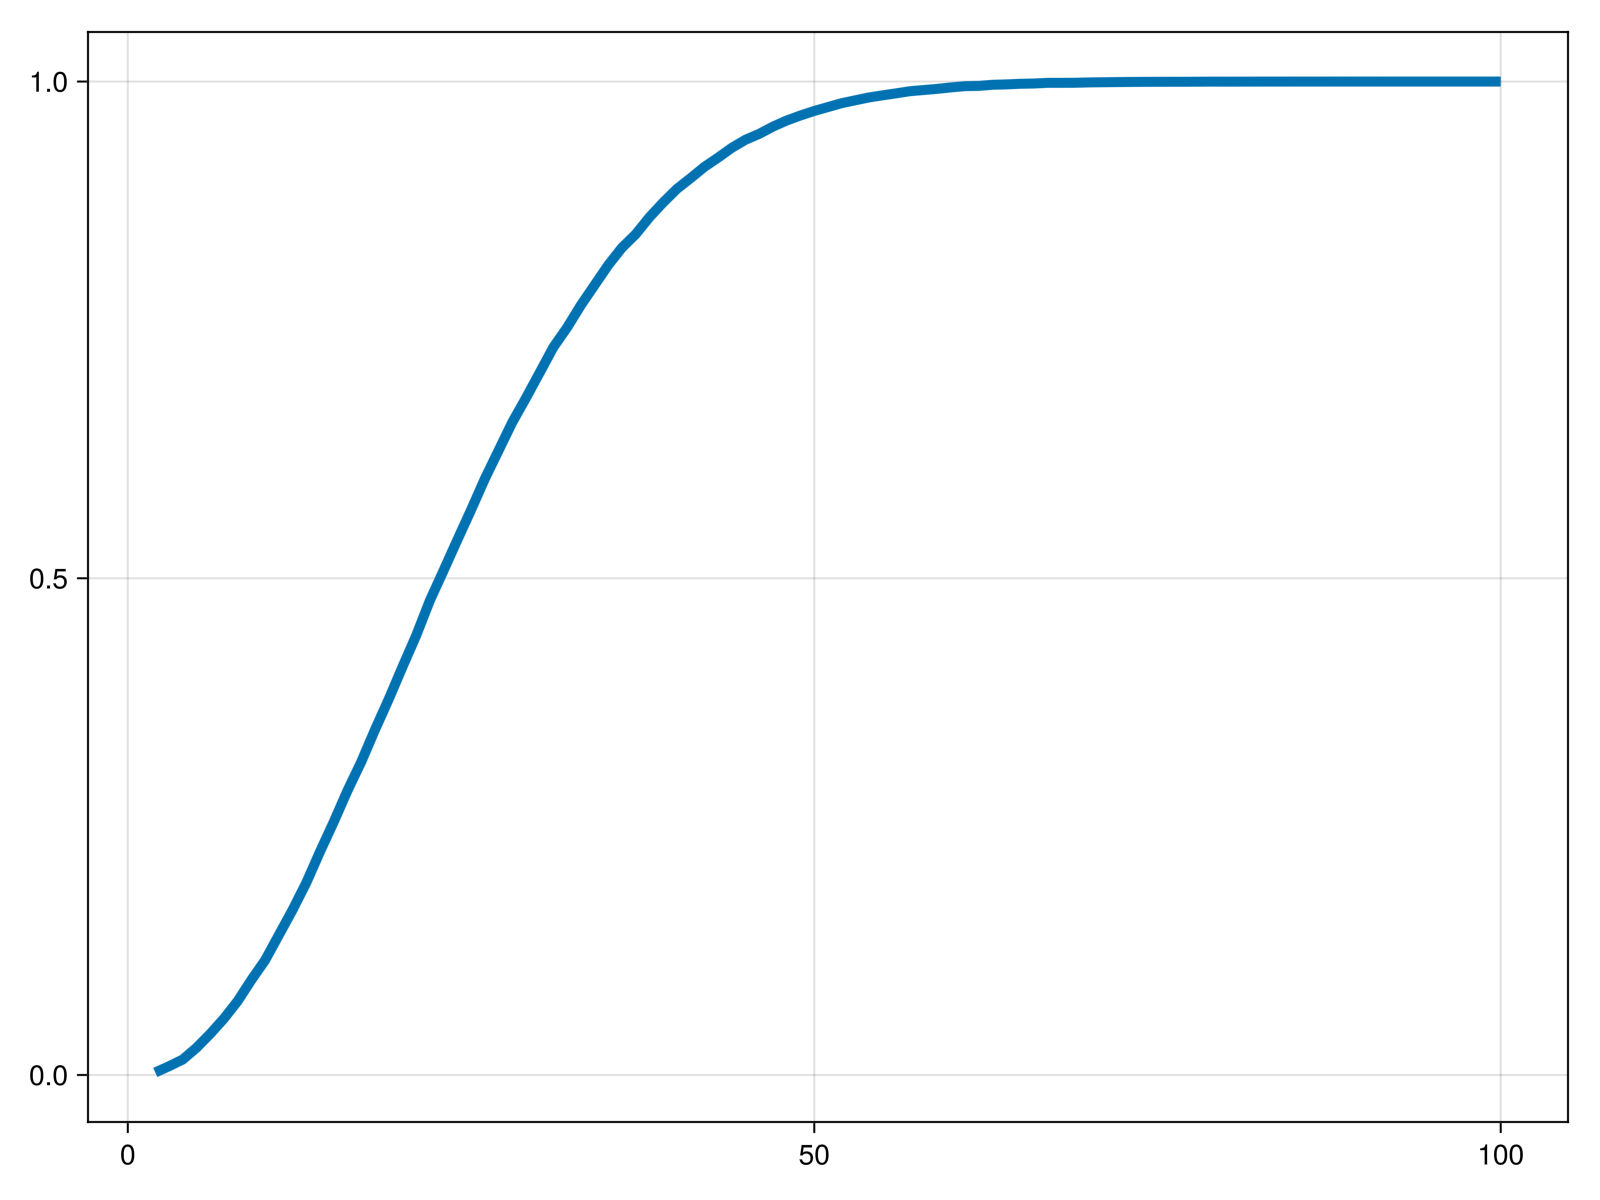

In [24]:
Nmin, Nmax, Msamples = 2, 100, 1000
P = BirthdayProblem(Nmin, Nmax, Msamples)

fig = Figure(;size = (800,600))
ax = Axis(fig[1,1])
lines!(ax, Nmin:Nmax, P, linewidth=5)
fig

In [ ]:
rand(1:365)